In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time
import joblib

In [58]:
svm_model_path = "../svm-gauss-results/svm-model-gauss-2p/svm_model_2percent_gauss.pkl"

loaded_svm = joblib.load(svm_model_path)
print("SVM model loaded successfully")

SVM model loaded successfully


In [59]:
def apply_gaussian_filter(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def load_and_preprocess_image(image_path, scale_percent, filter_type=False):
    image = cv2.imread(image_path)
    new_width = int(image.shape[1] * scale_percent / 100)
    new_height = int(image.shape[0] * scale_percent / 100)
    resized_image = cv2.resize(image, (new_width, new_height))
    
    if filter_type:
        resized_image_filtered = apply_gaussian_filter(resized_image)
        print("Filtered with Gaussian")
    
    return resized_image_filtered, resized_image

def predict_image(image_path, svm_model, scale_percent, filtered_with_gauss):
    new_image_filtered, new_image = load_and_preprocess_image(image_path, scale_percent, filtered_with_gauss)
    flat_new_image = new_image_filtered.reshape((-1, 3))
    predicted_labels = svm_model.predict(flat_new_image)
    predicted_mask = predicted_labels.reshape(new_image_filtered.shape[:2])
    return new_image, predicted_mask

In [63]:
scale_percent = 3
new_image_path = '../satellite-images/Miami.jpg'

filtered_with_gauss = True

start_time = time.time()
new_image, new_predicted_mask = predict_image(new_image_path, loaded_svm, scale_percent, filtered_with_gauss)
end_time = time.time()
print(f"Time spent predicting: {end_time - start_time}")

Filtered with Gaussian
Time spent predicting: 287.6794090270996


In [64]:
# new_image_save_path = "../svm-results/svm-model-2p/Miami_2p_image.pkl"
# new_predicted_mask_save_path = "../svm-results/svm-model-2p/Miami_2p_water_mask.pkl"



# new_image_save_path = "../svm-gauss-results/svm-model-gauss-1p/Miami_2p_image.pkl"
# new_predicted_mask_save_path = "../svm-gauss-results/svm-model-gauss-1p/Miami_2p_water_mask.pkl"

new_image_save_path = "../svm-gauss-results/svm-model-gauss-2p/Miami_3p_image.pkl"
new_predicted_mask_save_path = "../svm-gauss-results/svm-model-gauss-2p/Miami_3p_water_mask.pkl"

joblib.dump(new_image, new_image_save_path)
joblib.dump(new_predicted_mask, new_predicted_mask_save_path)

['../svm-gauss-results/svm-model-gauss-2p/Miami_3p_water_mask.pkl']

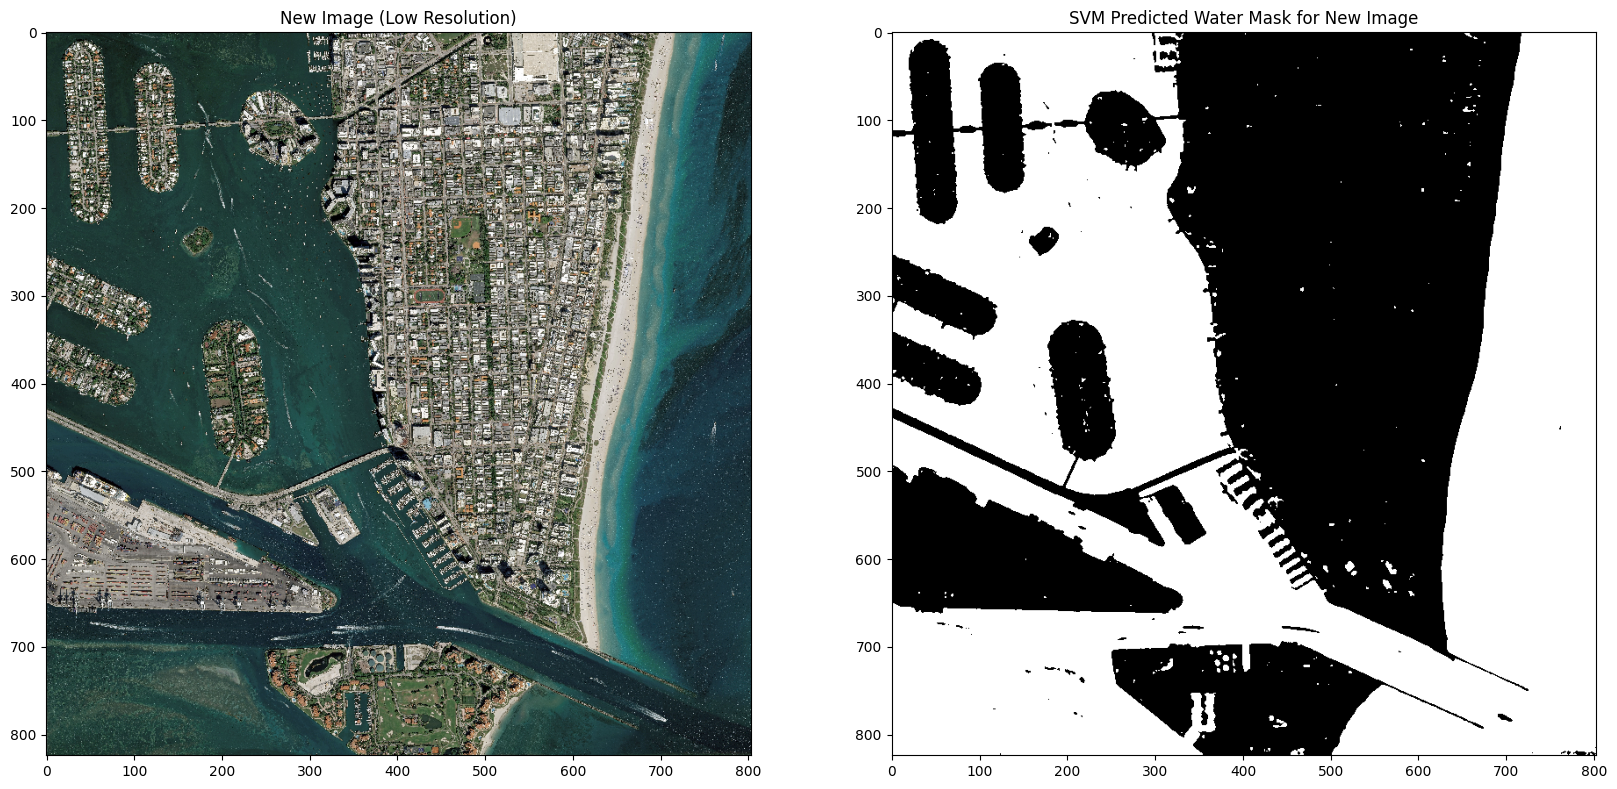

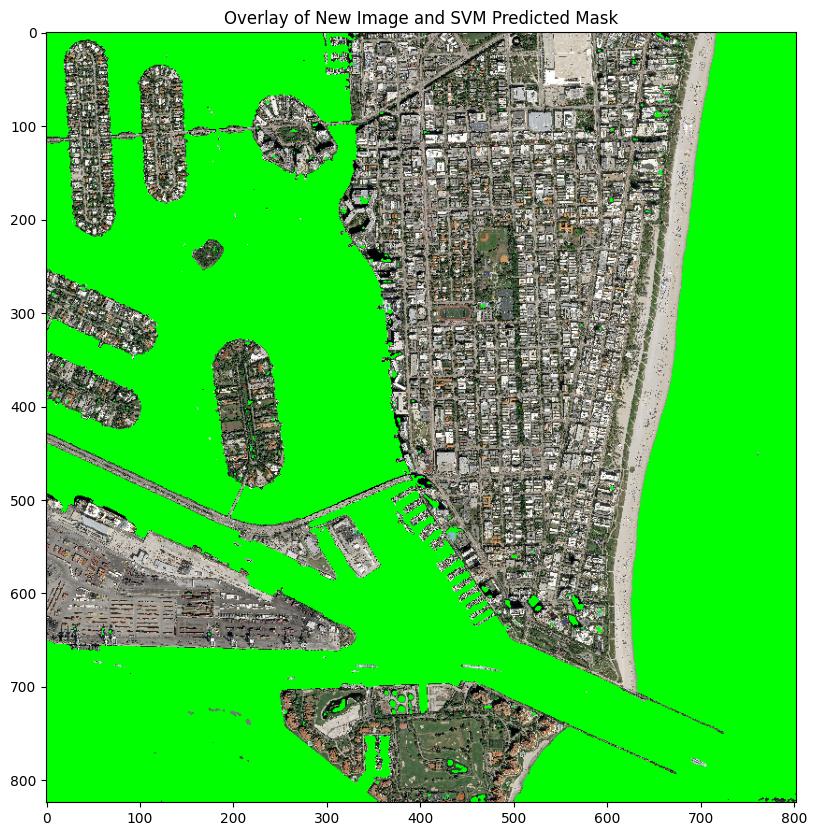

In [65]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title('New Image (Low Resolution)')
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('SVM Predicted Water Mask for New Image')
plt.imshow(new_predicted_mask, cmap='gray')

# Overlay images to compare
overlay_new = new_image.copy()
overlay_new[new_predicted_mask == 1] = [0, 255, 0]  # Highlight predicted water areas in green

plt.figure(figsize=(10, 10))
plt.title('Overlay of New Image and SVM Predicted Mask')
plt.imshow(cv2.cvtColor(overlay_new, cv2.COLOR_BGR2RGB))

plt.show()